In [62]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/raw/yelp_business.csv")

### Seperate all the categories

In [41]:
cats = df['categories'].str.split(';')

## Creating a master list of all categories
exported to own csv file because it took so long (And I don't wanna do it again)
# Don't run this: It takes 20 mins to run
### If needed, run cell below it

In [244]:
new = []

for i in range(len(cats)):
    new = new + cats[i]

categories = pd.DataFrame({'names': new})

categories.to_csv('categoryList.csv', index=False)

KeyboardInterrupt: 

### This one :) 

In [63]:
categories = pd.read_csv("categoryList.csv") #Simples, not 20 mins of waiting

# What are our top 10 categories?

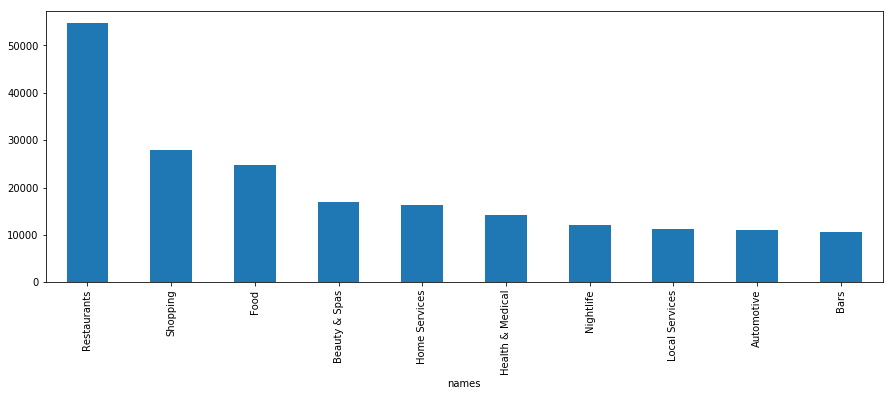

In [64]:
popular = categories.groupby('names').size().sort_values(ascending=False)
topCats = popular.to_frame()

topCats.columns = ['size']
top10 = topCats.head(10)

top10.plot(kind='bar', legend=False, figsize=(15,5))

# What are our chain franchises?

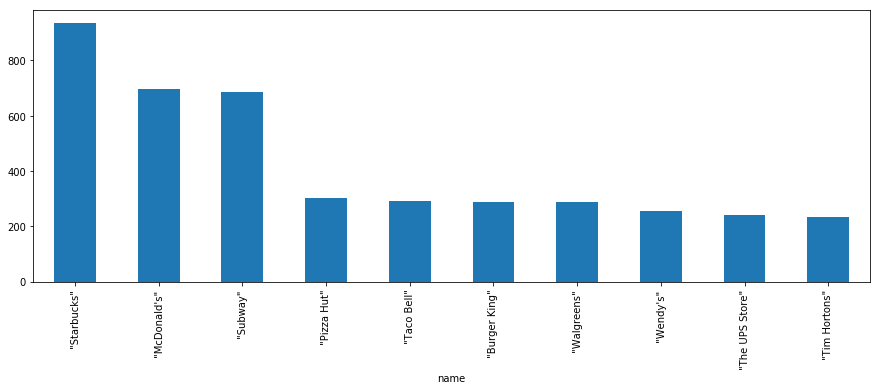

In [65]:
franchise = df.groupby('name').size().sort_values(ascending=False)
chains = franchise.to_frame()

chains.columns = ['occurences']
top10chain = chains.head(10)

top10chain.plot(kind='bar', legend=False, figsize=(15,5))

# Where are our Starbucks?
Over 30 Starbucks on the Las Vegas Strip alone :o

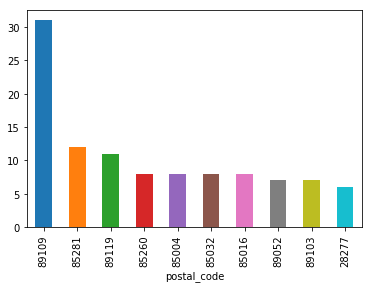

In [66]:
star = df[df['name'] =='"Starbucks"']
location = star.groupby('postal_code').size().sort_values(ascending=False)
top10star = location.head(10)
top10star.plot(kind='bar')

In [61]:
def findCategory(frame, x):
    import pandas as pd
    
    newFrame = frame
    items = []
    for a in x:
        items.append(a)
        
    for i in range(len(items)):
        newFrame = newFrame[newFrame['categories'].str.contains(items[i])]
        
    return newFrame  

findCategory(df, ["Shopping", "Fitness"])

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
230,lXGx_aKtF_UxenWDDkogWg,"""Northern Karate School""",NaN,"""756 St Clair Avenue W""",Toronto,ON,M6C 1B5,43.681432,-79.428377,4.0,6,1,Active Life;Sporting Goods;Karate;Education;Sh...
1543,OLrv5MZNuLBuKiYVYQHRnw,"""Golf Galaxy""",NaN,"""880 N 54th St""",Chandler,AZ,85226,33.317273,-111.968504,3.5,3,1,Fitness & Instruction;Sporting Goods;Golf Equi...
3897,hDhC_DgEIKK5D961doKOXQ,"""Durst Cycle & Fitness""",NaN,"""1112 W University Ave""",Urbana,IL,61801,40.116687,-88.223736,2.0,30,1,Wedding Planning;Event Planning & Services;Ska...
4252,rcMVvJGbQnPB4eOtSFERCw,"""Bulldog Performance Nutrition""",NaN,"""1396 Don Mills Road, Suite 108B""",Toronto,ON,M3B 3N1,43.748826,-79.347601,2.5,3,1,Gyms;Health & Medical;Fitness/Exercise Equipme...
4607,QkmEZDOFtrvq4m_SBsM76g,"""Pure Barre - Westlake Avon""",NaN,"""33576 Detroit Rd""",Avon,OH,44011,41.453117,-81.988914,4.5,8,1,Barre Classes;Fitness & Instruction;Active Lif...
4694,o9Kykfo0Pb06Ibil1QJbgA,"""Academy Sports + Outdoors""",NaN,"""8675 Concord Mills Blvd""",Concord,NC,28027,35.373076,-80.730236,3.5,9,1,Shopping;Outdoor Gear;Shoe Stores;Swimwear;Fas...
4885,bUO8dz-qFbjglu2dF_6-zw,"""Toronto BJJ""",Bickford Park,"""813 Bloor Street W""",Toronto,ON,M6G 1L8,43.662562,-79.421766,4.0,11,1,Specialty Schools;Shopping;Education;Sporting ...
4895,pDn3TAjVcY7TqtZD9YI38A,"""Psycle""",NaN,"""24945 Detroit Rd""",Westlake,OH,44145,41.470266,-81.896853,5.0,4,0,Sporting Goods;Fitness & Instruction;Active Li...
5729,acjRuOPMsZtoPbvuADvVNg,"""Lululemon Athletica""",Yonge and Eglinton,"""2558 Yonge Street""",Toronto,ON,M4P 2J2,43.713484,-79.399993,3.5,9,1,Sporting Goods;Fitness & Instruction;Yoga;Spor...
7357,hX-J2rpHHJKUtIv-J7r3TA,"""Mare Athletic Wear""",Edgewater,"""10431 Clifton Blvd""",Cleveland,OH,44102,41.485068,-81.757317,5.0,3,0,Fashion;Sports Wear;Fitness & Instruction;Acti...
